# Machine Failure Prediction

#### Purpose is to select which is best Algorithm for given specific dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step1. Read the Dataset

In [2]:
import pandas as pd
df1 = pd.read_csv("train.csv")
df1

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df1.shape

(136429, 14)

### Step2: Check the missing values

In [5]:
df1.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Check number of unique values

In [6]:
df1.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

### Step3: Separate X and Y
~
Machine Failure = Remaining Features

Statistically insignificant = ID, Product ID
~

In [7]:
df1.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [8]:
X = df1.drop(columns=['id', 'Product ID', 'Machine failure'], axis = 1)
Y = df1[['Machine failure']]

In [9]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [10]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [11]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

### Step4: Separate Categorical and Continuous features of X

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Type']

In [14]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Step5: Create a Pipeline for Feature Selection with Mutual Information Scores
~
Cat = Ordinal Encoding
~

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [16]:
# Create Numeric pipeline

num_pipe1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

#Categorical Pipeline

cat_pipe1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

# Combine both pipelines with Column Transfer

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)])

In [17]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [18]:
cols = pre1.get_feature_names_out()
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### Step6: Find Mutual Information Scores

In [19]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.0058545 , 0.0018316 , 0.01952376, 0.01942138, 0.00649782,
       0.00857076, 0.02437705, 0.01162526, 0.01959921, 0.00128618,
       0.01161874])

In [20]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024377
num__OSF                        0.019599
num__Rotational speed [rpm]     0.019524
num__Torque [Nm]                0.019421
num__PWF                        0.011625
cat__Type                       0.011619
num__TWF                        0.008571
num__Tool wear [min]            0.006498
num__Air temperature [K]        0.005854
num__Process temperature [K]    0.001832
num__RNF                        0.001286
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

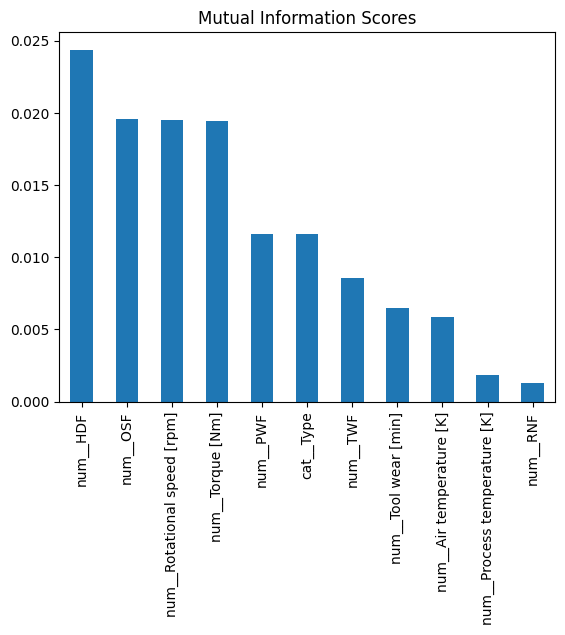

In [21]:
mi.plot(kind='bar', title='Mutual Information Scores')

#### In the above graph it is visualizing which features are important. Here if required we can perform feature selection

### Step7: Final Sklearn Pipeline with OnehotEncoder

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
# Numerical Pipeline 2

num_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

# Categorical Pipeline 2

cat_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

# Combine both pipeline

pre2 = ColumnTransformer([('num', num_pipe2, con),
                          ('cat', cat_pipe2, cat)])

In [24]:
X_pre2 = pre2.fit_transform(X)
X_pre2

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
cols2 = pre2.get_feature_names_out()
cols2

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [26]:
X_pre2 = pd.DataFrame(X_pre2, columns=cols2)
X_pre2.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


#### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre2, Y, test_size=0.2, random_state=42)


In [28]:
xtrain.shape

(109143, 13)

In [29]:
xtest.shape

(27286, 13)

### Step8: Perform Algorithm Evaluation

Checking which algorithm gives best results

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [31]:
dct = {'Logistic' : LogisticRegression(),
       'DecisionTree' : DecisionTreeClassifier(),
       'RandomForest' : RandomForestClassifier(),
       'GradientBoost' : GradientBoostingClassifier()
       }

In [32]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoost', GradientBoostingClassifier())])

In [33]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [34]:
tr = []
ts = []
cv = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)

    # Predict train and test data
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    # Calculate train and test F1 scores
    tr_f1 = f1_score(ytrain, ypred_tr)
    ts_f1 = f1_score(ytest, ypred_ts)

    # Give CV scores in training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    tr_cv = scores.mean()

    # Append all the scores in blank lists
    tr.append(tr_f1)
    ts.append(ts_f1)
    cv.append(tr_cv)

    # Print all the results
    print(f'Model Name : {name}')
    print(f'Training F1 Score : {tr_f1:.4f}')
    print(f'Testing F1 Score : {ts_f1:.4f}')
    print(f'Cross Validation Score : {tr_cv:.4f}')
    print('\n===================================================\n')


Model Name : Logistic
Training F1 Score : 0.8625
Testing F1 Score : 0.8649
Cross Validation Score : 0.8622


Model Name : DecisionTree
Training F1 Score : 0.9950
Testing F1 Score : 0.7604
Cross Validation Score : 0.7424


Model Name : RandomForest
Training F1 Score : 0.9950
Testing F1 Score : 0.8641
Cross Validation Score : 0.8590


Model Name : GradientBoost
Training F1 Score : 0.8732
Testing F1 Score : 0.8637
Cross Validation Score : 0.8584




#### Display all the models scores in dataframes

In [35]:
dct.keys()

dict_keys(['Logistic', 'DecisionTree', 'RandomForest', 'GradientBoost'])

In [36]:
eval_dict ={'Model Name' : dct.keys(),
            'TrainingF1' : tr,
            'TestingF1' : ts,
            'TrainCV' : cv}

In [37]:
eval_dict

{'Model Name': dict_keys(['Logistic', 'DecisionTree', 'RandomForest', 'GradientBoost']),
 'TrainingF1': [0.8625247851949769,
  0.9950073421439061,
  0.9950190448285965,
  0.8732394366197184],
 'TestingF1': [0.8648648648648648,
  0.7604049493813273,
  0.8641025641025641,
  0.8636942675159236],
 'TrainCV': [0.862230147905569,
  0.7423953870123423,
  0.859017681232541,
  0.8583881495570473]}

In [38]:
eval_df = pd.DataFrame(eval_dict)
eval_df

,Model Name,TrainingF1,TestingF1,TrainCV
0,Logistic,0.862525,0.864865,0.862230
1,DecisionTree,0.995007,0.760405,0.742395
2,RandomForest,0.995019,0.864103,0.859018
3,GradientBoost,0.873239,0.863694,0.858388


In [39]:
eval_df.sort_values(by='TrainCV', ascending=False)

,Model Name,TrainingF1,TestingF1,TrainCV
0,Logistic,0.862525,0.864865,0.862230
2,RandomForest,0.995019,0.864103,0.859018
3,GradientBoost,0.873239,0.863694,0.858388
1,DecisionTree,0.995007,0.760405,0.742395


#### Step 9: Tune the best model with Randomized Searh CV

In [40]:
params = {'C' : [0.01, 0.1, 1, 10, 50, 100, 500, 1000]}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 500,
                                              1000]},
                   scoring='f1')

In [42]:
rscv.best_params_

{'C': 0.1}

In [43]:
rscv.best_score_

0.862513786746223

In [44]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.1)

#### Getting accuracy of model in train and test

In [45]:
best_lr.score(xtrain, ytrain)

0.9961976489559569

In [46]:
best_lr.score(xtest, ytest)

0.9961518727552591

#### Predict all the values in train and test

In [47]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [48]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [49]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [50]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [51]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


#### Create a Confusion Matrix

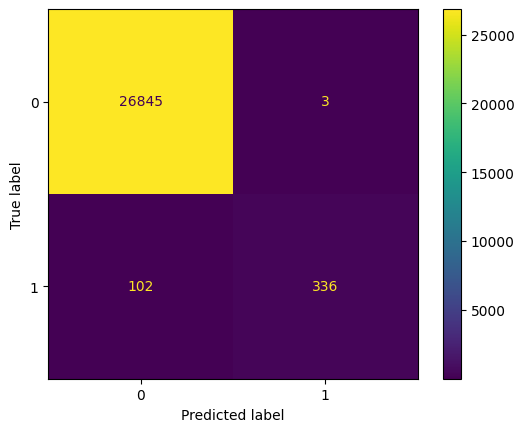

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

#### Classification Report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Step10: Plotting ROC-AUC Curve

In [54]:
yprod_ts = best_lr.predict_proba(xtest)[:,1]
yprod_ts

array([0.9936134 , 0.00229177, 0.00240948, ..., 0.00166598, 0.01041991,
       0.00154054])

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprod_ts)

0.936784998993148

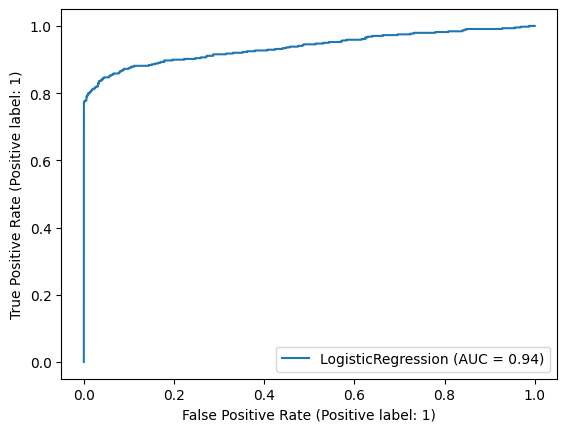

In [57]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

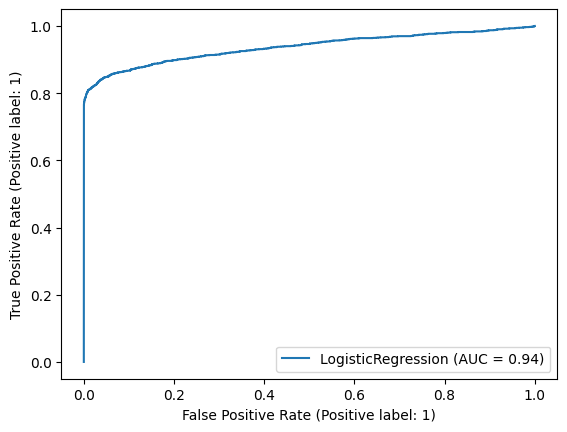

In [58]:
RocCurveDisplay.from_estimator(best_lr, xtrain, ytrain)

### Step10: Predicting the Machine Failure for new data

In [59]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [60]:
xnew.shape

(90954, 13)

In [61]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [62]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [63]:
cols2

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [65]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols2)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Predict the data

In [67]:
preds = best_lr.predict(xnew_pre)

In [68]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [69]:
prob = best_lr.predict_proba(xnew_pre)[:,1]
prob

array([0.00222472, 0.001099  , 0.00270896, ..., 0.00306237, 0.00240547,
       0.00241205])

### Saving above results in dataFrame

In [70]:
df_pred = xnew[['id']]
df_pred

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [71]:
df_pred['Machine failure'] = preds

In [72]:
df_pred['Probability'] = prob

In [73]:
df_pred

,id,Machine failure,Probability
0,136429,0,0.002225
1,136430,0,0.001099
2,136431,0,0.002709
3,136432,0,0.003088
4,136433,0,0.003862
...,...,...,...
90949,227378,0,0.002335
90950,227379,0,0.000514
90951,227380,0,0.003062
90952,227381,0,0.002405


In [74]:
df_pred['Machine failure'].value_counts()

Machine failure
0    89849
1     1105
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

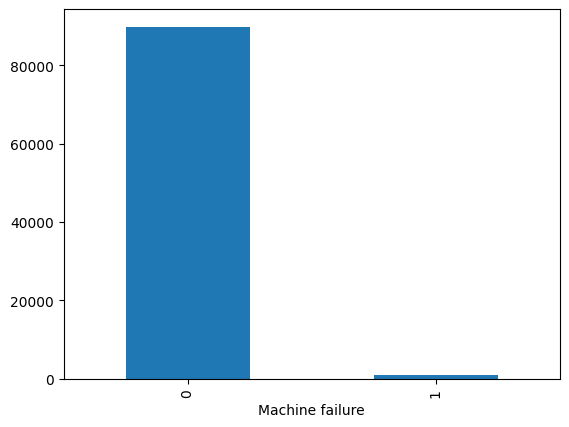

In [75]:
df_pred['Machine failure'].value_counts().plot(kind='bar')

In [76]:
df_pred[df_pred['Machine failure']==1]

,id,Machine failure,Probability
17,136446,1,0.992193
209,136638,1,0.995085
223,136652,1,0.987978
397,136826,1,0.996171
405,136834,1,0.997852
...,...,...,...
90503,226932,1,0.987178
90665,227094,1,0.999689
90679,227108,1,0.683119
90784,227213,1,0.983046


In [77]:
df_pred.to_csv('Predictions.csv', index=False)